In [1]:
import tensorflow as tf
import os

In [2]:
# # Avoid OOM errors by setting GPU Memory Consumption Growth
# gpus = tf.config.experimental.list_physical_devices('PU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# tf.config.list_physical_devices('GPU')

# 2. Remove dodgy images

In [4]:
import cv2
import numpy as np
import imghdr
import matplotlib.pyplot as plt

C:\Users\Saloni Sukirti\AppData\Local\Temp\ipykernel_17156\1221195670.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = "Dataset"

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
os.listdir(data_dir)

['Bicycle', 'Bike', 'Car', 'Cart', 'trucks']

In [8]:
# for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         print(image)

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

# 3. Load Data

In [10]:
print(tf.__version__)

2.13.0


In [11]:
data = tf.keras.utils.image_dataset_from_directory('Dataset')

Found 1452 files belonging to 5 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
batch[1]

array([4, 3, 3, 4, 2, 3, 3, 1, 3, 2, 2, 3, 0, 2, 0, 2, 1, 1, 1, 3, 1, 4,
       1, 3, 4, 2, 3, 1, 0, 3, 1, 1])

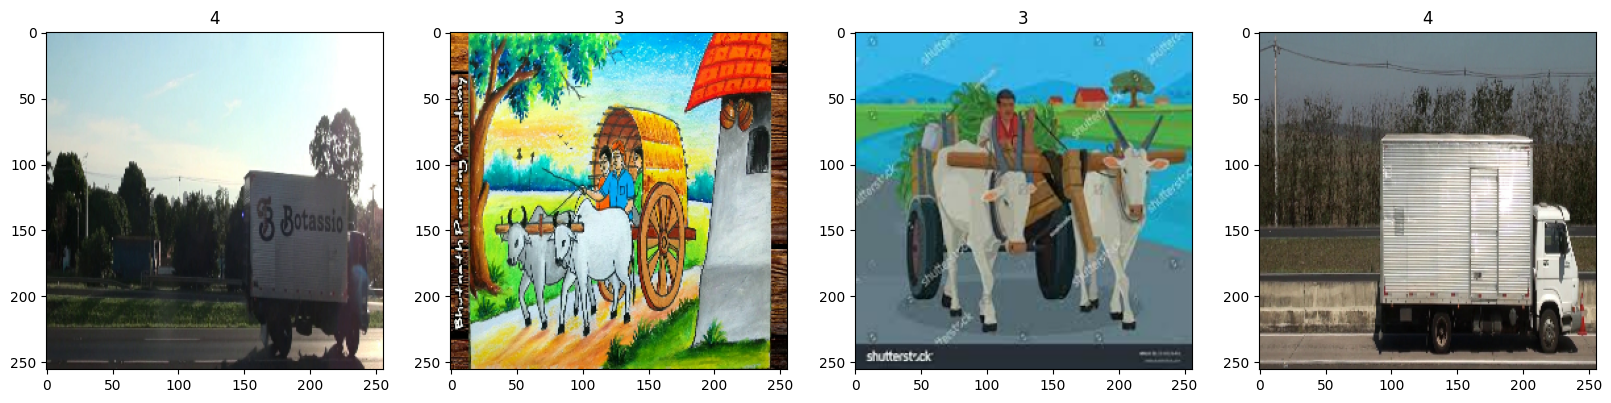

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
#data.as_numpy_iterator().next()

# 5. Split Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

32

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [25]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [27]:
logdir='logs'

In [28]:
loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False)

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
# # Compile the model with the loss function and optimizer
# model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

# # Train the model
# hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

In [31]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50


32/32 [==============================] - 80s 2s/step - loss: 1.3028 - accuracy: 0.4785 - val_loss: 0.8829 - val_accuracy: 0.6285
Epoch 2/50
32/32 [==============================] - 71s 2s/step - loss: 0.6315 - accuracy: 0.7559 - val_loss: 0.6054 - val_accuracy: 0.7326
Epoch 3/50
32/32 [==============================] - 66s 2s/step - loss: 0.3722 - accuracy: 0.8682 - val_loss: 0.5830 - val_accuracy: 0.8021
Epoch 4/50
32/32 [==============================] - 67s 2s/step - loss: 0.2252 - accuracy: 0.9268 - val_loss: 0.5151 - val_accuracy: 0.8368
Epoch 5/50
32/32 [==============================] - 67s 2s/step - loss: 0.1811 - accuracy: 0.9365 - val_loss: 0.6271 - val_accuracy: 0.7882
Epoch 6/50
32/32 [==============================] - 64s 2s/step - loss: 0.1127 - accuracy: 0.9639 - val_loss: 0.4047 - val_accuracy: 0.8750
Epoch 7/50
32/32 [==============================] - 58s 2s/step - loss: 0.0482 - accuracy: 0.9902 - val_loss: 0.3794 - val_accuracy: 0.8924
Epoch 8/50
32/32 [=============

# 8. Plot Performance

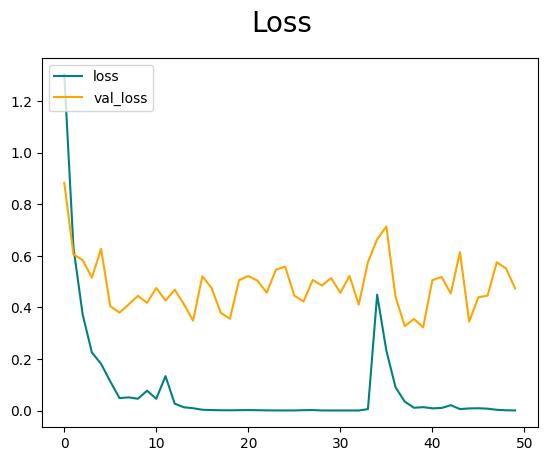

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

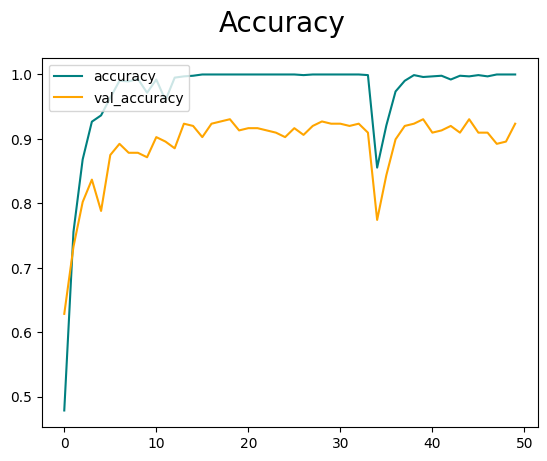

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [36]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)  # Assuming yhat contains logits or probabilities, NOT class indices
    yhat_classes = tf.argmax(yhat, axis=-1)  # Convert predicted probabilities to class indices

    pre.update_state(y, yhat_classes)
    re.update_state(y, yhat_classes)
    acc.update_state(y, yhat)  # Use yhat instead of yhat_classes for SparseCategoricalAccuracy


1/1 [==============================] - 0s 189ms/step


In [37]:
# for batch in test.as_numpy_iterator(): 
#     X, y = batch
#     yhat = model.predict(X)
#     pre.update_state(y, yhat)
#     re.update_state(y, yhat)
#     acc.update_state(y, yhat)

In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.94545454, shape=(), dtype=float32) tf.Tensor(0.9904762, shape=(), dtype=float32) tf.Tensor(0.8984375, shape=(), dtype=float32)


# 10. Test

In [39]:
import cv2

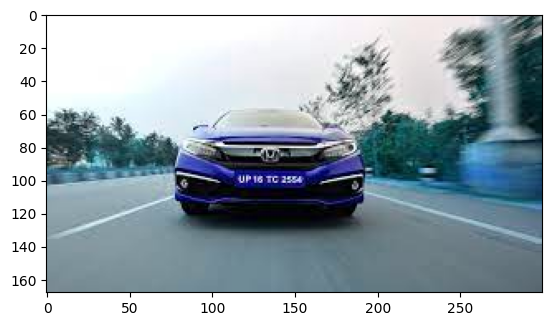

In [40]:
img = cv2.imread('testd.jpeg')
plt.imshow(img)
plt.show()

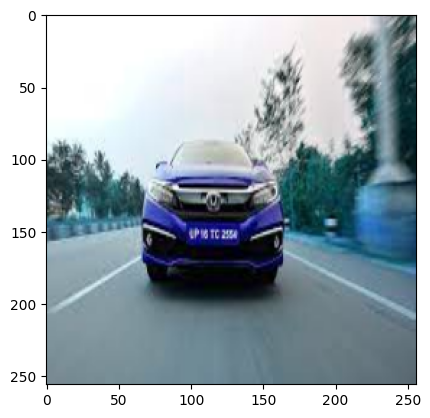

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
class_labels=['Bicycle','Bike','Car','Cart','Truck']

In [43]:
# Preprocess the image and expand its dimensions to simulate a batch size of 1
image_batch = np.expand_dims(resize / 255, axis=0)

# Make predictions using the model
yhat = model.predict(image_batch)

# 'yhat' will contain the predicted probabilities for each class
# If you want to get the predicted class index (the class with the highest probability),
# you can use np.argmax to find the index with the highest probability
predicted_class_index = np.argmax(yhat, axis=-1)

# Now you can use 'predicted_class_index' to get the predicted class label
# (assuming you have a list of class labels, e.g., ['bus', 'car', 'truck'])
predicted_class_label = class_labels[predicted_class_index[0]]

print("Predicted class label:", predicted_class_label)

1/1 [==============================] - 0s 182ms/step
Predicted class label: Car


In [44]:
# yhat = model.predict(np.expand_dims(resize/255, 0))

In [45]:
# print(yhat)

In [46]:
# if (yhat > 0.5 and yhat<1.5): 
#     print(f'Predicted class is Bike')
# elif (yhat > 1.5 and yhat<2.5):
#     print(f'Predicted class is cars')
# elif (yhat > 2.5 and yhat<3.5):
#     print(f'Predicted class is shopping carts')
# elif (yhat<0.5):
#     print(f'Predicted class is Bicycle')
# else:
#     print(f'Predicted class is trucks')

# 11. Save the Model

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save(os.path.join('models','imageclassifier.h5'))

c:\Users\Saloni Sukirti\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
new_model = load_model('models/imageclassifier.h5')

In [50]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 179ms/step


array([[5.9967881e-08, 3.5425976e-05, 9.9996448e-01, 2.8033993e-08,
        1.7447195e-11]], dtype=float32)